In [38]:
# 整理并导入原始数据
import pandas as pd, sqlite3 as lite, numpy as np

# 2017.8.29-2017.9.30职员销售明细表.xls
# 2017.10.1-2017.10.10职员销售明细表.xls
df = pd.read_excel('data\\2017.10.1-2017.10.10职员销售明细表.xls.xls',sheetname='2017.10.1-2017.10.10职员销售明细表.xls',index_col=0)
# print(df.columns)
# print(df.dtypes)
df['职员名称'] = None
df=df.loc[:,['日期','单据编号','单据类型','职员名称','摘要','备注','商品备注','商品编号','商品全名',
             '单价','单位','数量','金额','单位全名','仓库全名','部门全名']]
df['日期'] = pd.to_datetime(df['日期'])
df['备注'] = df['备注'].astype(object)
# print(df.columns)
# print(df.dtypes)
# print(len(df))
dfdel = df[(df.单位全名.isnull().values==True) & ((df.单据编号.isnull().values == True) |  (df.单据编号 =='小计') |  (df.单据编号 =='合计'))]
hangdel = list(dfdel.index)
# print(hangdel)
# print(dfdel)
df1 = df.drop(hangdel)
# print(df1.columns)
# print(len(df1))
# print(df1)
dfzhiyuan = df1[df1.单位全名.isnull().values == True]
# print(len(dfzhiyuan))
# print(dfzhiyuan)
zyhang = list(dfzhiyuan.index)
zyming = list(dfzhiyuan['单据编号'])
# print(zyhang)
# print(zyming)
for i in range(len(zyhang)):
    df.loc[zyhang[i]:,'职员名称'] = zyming[i]
    
dfdel = df[df.单位全名.isnull().values==True]
print(dfdel[['日期','单据编号','数量','金额']])
hangdel = list(dfdel.index)
print(hangdel)
df2 = df.drop(hangdel)
# print(df2.dtypes)
# print(df2.columns)
# print(len(df2))
# print(df2)
df2.index = range(len(df2))
# del df[行号]
# print((df2[df2.商品备注.isnull().values == False])[['日期','职员名称','单位全名','金额','单据编号','摘要','商品备注']])
# print((df2[df2.日期 == pd.to_datetime('2017-09-09')])[['日期','职员名称','单位全名','金额','单据编号','备注','商品备注']])
# cnx = lite.connect('data\\quandan.db')
# df2.to_sql(name='xiaoshoumingxi', con=cnx, if_exists='append', chunksize=10000)

      日期 单据编号        数量         金额
行号                                
1    NaT  梅富忠       NaN        NaN
915  NaT   小计   16183.0   20798.46
916  NaT  NaN       NaN        NaN
917  NaT  耿华忠       NaN        NaN
1125 NaT   小计   85318.0   64627.87
1126 NaT  NaN       NaN        NaN
1127 NaT  徐志伟       NaN        NaN
1711 NaT   小计   11361.0   14019.75
1712 NaT  NaN       NaN        NaN
1713 NaT   陈威       NaN        NaN
2533 NaT   小计   20525.0   22646.79
2534 NaT  NaN       NaN        NaN
2535 NaT   周莉       NaN        NaN
2705 NaT   小计    5993.0    7083.00
2706 NaT  NaN       NaN        NaN
2707 NaT  王家龙       NaN        NaN
3009 NaT   小计    7822.0   10891.05
3010 NaT  NaN       NaN        NaN
3011 NaT  胡明景       NaN        NaN
3581 NaT   小计   15393.2   16012.71
3582 NaT  NaN       NaN        NaN
3583 NaT  朱经伦       NaN        NaN
3896 NaT   小计    8306.0   10254.30
3897 NaT  NaN       NaN        NaN
3898 NaT   合计  170901.2  166333.93
[1, 915, 916, 917, 1125, 1126, 1127, 1711, 1712, 1713, 

                                      日期  items
日期                                             
2012-11-30 00:00:00  2012-11-30 00:00:00    181
2012-12-03 00:00:00  2012-12-03 00:00:00      3
2012-12-04 00:00:00  2012-12-04 00:00:00    620
2012-12-05 00:00:00  2012-12-05 00:00:00    971
2012-12-06 00:00:00  2012-12-06 00:00:00    309
2012-12-07 00:00:00  2012-12-07 00:00:00    700
2012-12-08 00:00:00  2012-12-08 00:00:00    986
2012-12-10 00:00:00  2012-12-10 00:00:00      4
2012-12-11 00:00:00  2012-12-11 00:00:00    817
2012-12-12 00:00:00  2012-12-12 00:00:00    777
2012-12-13 00:00:00  2012-12-13 00:00:00    203
2012-12-14 00:00:00  2012-12-14 00:00:00    450
2012-12-15 00:00:00  2012-12-15 00:00:00    138
2012-12-17 00:00:00  2012-12-17 00:00:00    675
2012-12-18 00:00:00  2012-12-18 00:00:00     34
2012-12-19 00:00:00  2012-12-19 00:00:00    749
2012-12-20 00:00:00  2012-12-20 00:00:00    700
2012-12-21 00:00:00  2012-12-21 00:00:00    990
2012-12-22 00:00:00  2012-12-22 00:00:00

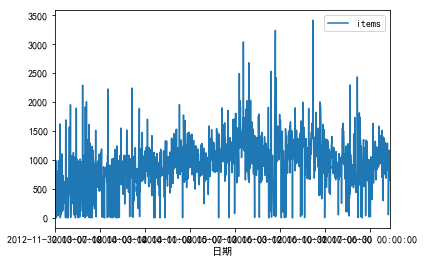

In [37]:
# 尝试各种呈现
import pandas as pd, sqlite3 as lite, matplotlib.pyplot as plt, numpy as np,calendar
from pylab import *

# plot中显示中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

conn = lite.connect('data\\quandan.db')
cursor = conn.cursor()
# df = pd.read_sql('select max(日期) as 日期 from xiaoshoumingxi',conn)
# print(df)
df = pd.read_sql('select 日期,count(*) as items from xiaoshoumingxi group by 日期', conn)
df.index = df['日期']
print(df)
df.plot()
plt.show()
plt.close()